In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import sys
from IPython.display import clear_output
import pandas as pd
import random
from utils import get_chars, get_words, save_img
# from highlight import HighlightWords
from keras.models import load_model

Using TensorFlow backend.


In [2]:
def plot_img(img, figsize=(20, 20)):
    plt.figure(figsize=figsize)
    plt.imshow(img, cmap='gray')

In [3]:
def process_img(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.threshold(img, 180, 255, cv2.THRESH_BINARY_INV)[1]
    return img

In [4]:
def read_imgs(path, process=True):
    filenames = os.listdir(path)
    if process:
        imgs = [process_img(path + name) for name in filenames if not 'ipynb' in name]
    else:
        imgs = [cv2.imread(path + name) for name in filenames if not 'ipynb' in name]
    return imgs

In [5]:
def read_one_img(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.threshold(img, 180, 255, cv2.THRESH_BINARY_INV)[1]
    img = cv2.resize(img, (28, 28))
    
    return img

In [6]:
def get_accuracy(model, imgs, words):
    correct = 0
    wrong = 0
    imgs = []
    for i, example in enumerate(words):
        for word, (x, y, w, h) in enumerate(example):
            temp_img = imgs[i][y:y+h, x:x+w]
#             print(temp_img)
            temp_img = resize(imgs[i], (x, y, w, h))
            temp_img = normalize_images(temp_img)
            
            if predicted == word:
                correct += 1
            else:
                wrong += 1
                
    accuracy = correct / (correct+wrong)
    return accuracy

In [7]:
class Dataset:
    def __init__(self):
        self._path = 'course_project/train/{}/{}.jpg'
        self._font_names = [ name for name in os.listdir('course_project/train/') if '.' not in name]
        self._indxs = np.zeros((49, 88))
        self._indxs[:] = np.arange(88)
        self._last_batch = None
        
    def gen_batches(self, seed=None):
        np.random.seed(seed)
        for row in range(49):
            self._indxs[row] = np.random.randint(49, size=88)
        self._last_batch = 0
    
    def get_batch(self):
        X = np.zeros((88, 28, 28, 1))
        y = np.zeros((88, 62))

        indx = 0
        for j, val in enumerate(self._indxs[self._last_batch+1]):
            path = self._path.format(self._font_names[int(val)], alphabet[j])
            X[indx] = read_one_img(path).reshape((28, 28, 1))
            y[indx][temp[j]] = 1
                
            indx += 1
        self._last_batch += 1
        
        indxs = np.random.permutation(88)
        
        return X[indxs], y[indxs]

In [32]:
path = 'course_project/test/x_test/'
imgs = read_imgs(path)
originals = read_imgs(path, process=False)

In [9]:
%%time
words = []
# chars = []
for img in imgs:
    temp_words = get_words(img)
#     chars.append(get_chars(img, temp_words))
    words.append(temp_words)

CPU times: user 63.6 ms, sys: 2.35 ms, total: 65.9 ms
Wall time: 65.6 ms


In [10]:
path_to_save = 'course_project/tested/'
for i, item in enumerate(words):
    temp_img = originals[i].copy()
    for (x, y, w, h) in item:
        cv2.rectangle(temp_img, (x, y), (x+w, y+h), (0, 255, 0))
        save_img(path_to_save, temp_img, str(i)+'.jpg')

Predicted: O


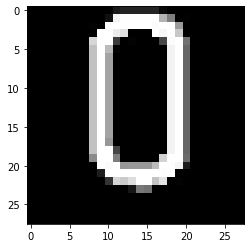

In [17]:
n = 23
# word = 23
word = 28
x, y, w, h = words[n][word]
temp = resize(imgs[n], (x, y, w, h))
temp = normalize_images(temp)
plt.imshow(np.reshape(temp, (28, 28)), cmap='gray')
temp = np.reshape(temp, (1, 28, 28, 1))
print('Predicted: {}'.format(alphabet2[np.argmax(model.predict(temp))]))

Predicted: 0


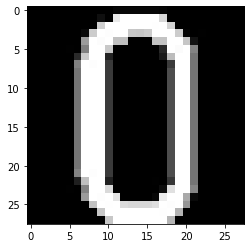

In [18]:
n = 23
# word = 23
word = 78
x, y, w, h = words[n][word]
temp = resize(imgs[n], (x, y, w, h))
temp = normalize_images(temp)
plt.imshow(np.reshape(temp, (28, 28)), cmap='gray')
temp = np.reshape(temp, (1, 28, 28, 1))
print('Predicted: {}'.format(alphabet2[np.argmax(model.predict(temp))]))